In [3]:
from structs.fanworks import FicLibrary
import pandas as pd
from encoder import make_multi_encoder, make_single_encoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from utils import make_numerical, make_log
plt.style.use("gruvbox.mplstyle")
import ast


Bad key font.mono in file gruvbox.mplstyle, line 31 ('font.mono : Iosevka')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key font.mono in file gruvbox.mplstyle, line 31 ('font.mono : Iosevka')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [4]:
data=FicLibrary.from_dataframe(pd.read_csv("data/our_flag_means_death_(tv).tsv", sep="\t")).fillna(0).to_csv("data/our_flag_means_death_(tv).tsv", sep="\t", index=False)
types=pd.read_pickle("types.pkl").to_dict()
types["date_updated"]=np.dtype("O")
data=FicLibrary.from_dataframe(pd.read_csv("data/our_flag_means_death_(tv).tsv", sep="\t", dtype=types, converters={k: lambda x: ast.literal_eval(x) for k in ["characters", "relationships", "fandoms", "tags", "warnings", "chapters", "categories"]}))

/tmp/ipykernel_695430/24191973.py:4: ParserWarning: Both a converter and dtype were specified for column chapters - only the converter will be used.
  data=FicLibrary.from_dataframe(pd.read_csv("data/our_flag_means_death_(tv).tsv", sep="\t", dtype=types, converters={k: lambda x: ast.literal_eval(x) for k in ["characters", "relationships", "fandoms", "tags", "warnings", "chapters", "categories"]}))
/tmp/ipykernel_695430/24191973.py:4: ParserWarning: Both a converter and dtype were specified for column categories - only the converter will be used.
  data=FicLibrary.from_dataframe(pd.read_csv("data/our_flag_means_death_(tv).tsv", sep="\t", dtype=types, converters={k: lambda x: ast.literal_eval(x) for k in ["characters", "relationships", "fandoms", "tags", "warnings", "chapters", "categories"]}))
/tmp/ipykernel_695430/24191973.py:4: ParserWarning: Both a converter and dtype were specified for column characters - only the converter will be used.
  data=FicLibrary.from_dataframe(pd.read_csv(

#### Encode non-numeric features (tags, ratings, characters, relationships, categories, warnings)


In [84]:
# ratings=make_single_encoder(data, 'ratings')
# warnings=make_multi_encoder(data, 'warnings')
# tags=make_multi_encoder(data, "tags")
# characters=make_multi_encoder(data, "characters")
# relationships=make_multi_encoder(data, "relationships")
# categories=make_multi_encoder(data, "categories")

0 3
1 2
2 3
3 2
3 3
4 3
5 4
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 2
14 3
15 3
16 3
17 3
18 3
19 3
20 3
21 3
22 3
23 2
24 3
25 2
26 3
27 3
28 3
29 3
30 3
31 3
32 3
33 3
34 2
35 3
36 3
37 3
38 3
39 3
40 5
41 3
42 5
43 3
44 3
45 2
46 3
47 0
48 3
49 3
50 3
51 0
51 4
52 3
53 3
54 3
55 3
56 3
57 3
58 3
59 2
60 5
61 3
62 2
63 3
64 2
65 3
66 3
67 3
68 2
69 3
70 3
71 3
72 2
73 2
74 3
75 2
76 2
77 2
78 3
79 2
80 2
81 3
82 2
83 3
84 3
85 3
86 3
87 3
88 3
89 3
90 3
91 2
91 3
92 0
93 2
94 3
95 3
96 3
97 3
98 3
99 3
100 2
101 3
102 3
103 3
104 0
105 3
106 2
107 3
108 3
109 3
110 3
111 3
112 2
113 3
114 3
115 2
116 0
117 3
118 3
119 3
120 0
120 2
120 5
121 3
122 3
123 2
124 2
125 3
126 3
127 3
128 3
129 3
130 5
131 3
132 3
133 3
134 3
135 3
136 3
137 3
138 3
139 2
140 3
141 2
142 3
143 3
144 3
145 2
146 3
147 2
148 3
149 3
150 2
151 2
152 4
153 3
154 3
155 5
156 3
157 2
158 0
159 3
160 3
161 3
162 3
163 3
164 2
165 3
166 0
166 5
167 3
168 3
169 4
170 3
171 3
172 3
173 3
174 3
175 0
175 5
176 3
177 2
178 

In [6]:
ratings=pd.read_csv("data/encoders/ofmd_ratings.tsv", sep="\t")
warnings=pd.read_csv("data/encoders/ofmd_warnings.tsv", sep="\t")
characters=pd.read_csv("data/encoders/ofmd_characters.tsv", sep="\t")
relationships=pd.read_csv("data/encoders/ofmd_relationships.tsv", sep="\t")
categories=pd.read_csv("data/encoders/ofmd_categories.tsv", sep="\t")
tags=pd.read_csv("data/encoders/ofmd_tags.tsv", sep="\t")

In [7]:
data=data.join(ratings).join(warnings).join(characters).join(relationships).join(categories).join(tags)

#### Calculate approval scores from hits and kudos


In [8]:
data["approval"]=data["hits"]/data["kudos"]
data["approval"]=data["approval"].replace(to_replace=np.inf, value=np.float64(0))

#### Save log values of all the numeric features


In [9]:
numeric = [
        "hits",
        "approval",
        "kudos",
        "bookmarks",
        "expected_chapters",
        "nchapters",
        "words",
        "comments",
    ]
make_log(data, numeric)

/home/el_hudson/.local/share/virtualenvs/fanficStats-S9ibzyb7/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/el_hudson/.local/share/virtualenvs/fanficStats-S9ibzyb7/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/el_hudson/.local/share/virtualenvs/fanficStats-S9ibzyb7/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/el_hudson/.local/share/virtualenvs/fanficStats-S9ibzyb7/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/el_hudson/.local/share/virtualenvs/fanficStats-S9ibzyb7/lib/python3.10/site-packages/pandas/co

#### Set up and train the model


In [31]:
model=LinearRegression()
news=[*categories.columns, *characters.columns, *relationships.columns]
y=data[["approval_log"]]
X=data[["nchapters_log", "words_log", *tags.columns, *ratings.columns, *warnings.columns, *news]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7)
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate the model


In [33]:
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse} \n R2: {r2}')

RMSE: 0.44670229604275175 
 R2: 0.3761783857991693


Text(0.5, 0, 'Approval Score')

findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.
findfont: Font family 'mono' not found.


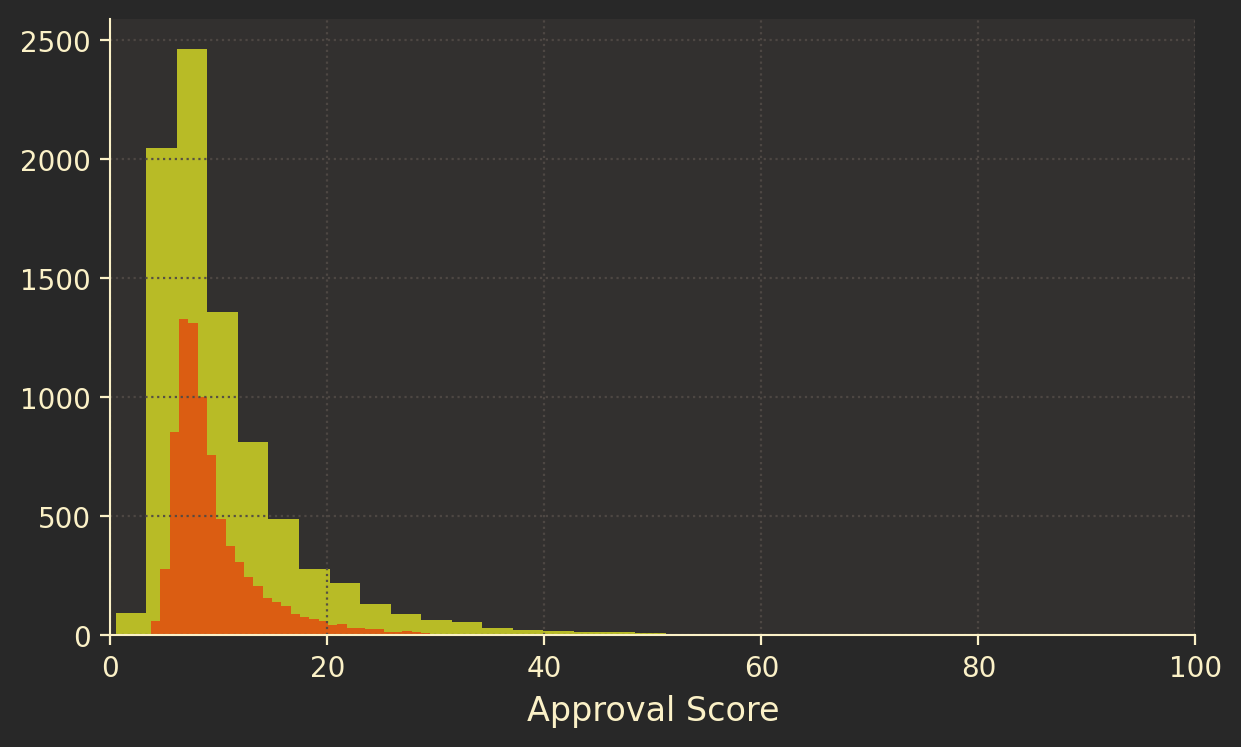

In [34]:
plt.hist(2**y_test, bins=100)
plt.hist(2**y_pred, bins=100, color="red", alpha=0.5)
plt.xlim((0,100))
plt.xlabel("Approval Score")

In [28]:
coefs=list(zip(X.columns, model.coef_[0]))
coefficients={
    "categories": [x for x in coefs if x[0] in categories.columns],
    "characters": [x for x in coefs if x[0] in characters.columns],
    "ratings": [x for x in coefs if x[0] in ratings.columns],
    "relationships": [x for x in coefs if x[0] in relationships.columns],
    "warnings": [x for x in coefs if x[0] in warnings.columns],
    "tags": [x for x in coefs if x[0] in tags.columns]
}
for c in coefficients.keys():
    coefficients[c].sort(key=lambda x: x[1])
    for item in coefficients[c]:
        item=(item[0].replace("|", r"\|"), item[1])
        
exports={e: pd.DataFrame.from_records(columns=["Feature", "Approval Coefficient"], data=coefficients[e]) for e in coefficients.keys()}
for e in exports.keys():
    exports[e].to_markdown(buf=f"results/{e}.md", mode="w+", index=False)

In [30]:
coefs

[('nchapters_log', 0.3236433053828153),
 ('words_log', -0.04504708706560308),
 ('Flashbacks', 0.19966518841656067),
 ('POV Multiple', 0.20012713892633782),
 ('BDSM', -0.024428882326402557),
 ('Sort Of', 0.08041113999701854),
 ('Blindfolds', -0.05083633579922839),
 ('Sexual Content', -0.037848319500133246),
 ('Daddy Kink', 0.09896584684586235),
 ('Comedy', 0.1030563266554543),
 ('Declarations Of Love', -0.013541316107537033),
 ('Whipping', -0.05894952511350981),
 ('Cute', 0.3858755162601347),
 ('Dancing', 0.008393727694956638),
 ('Bad BDSM Etiquette', -0.010696412454137704),
 ('Sex Work', 0.0388051839909601),
 ('Puppy Play', 0.12434851947033503),
 ('Slice of Life', -0.0893543362372882),
 ('Face-Sitting', -0.09560917750013057),
 ('Everyone Is Gay', 0.0869365866407933),
 ('Soulmates', 0.08843686760427324),
 ('Jealousy', -0.024733097700272735),
 ('Kink Negotiation', -0.013982741628778874),
 ('Warning: Israel Hands', 0.24276574111171045),
 ('Marriage', 0.1167121509496793),
 ('Fluffvember', 